In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import BoxStyle
from matplotlib.lines import Line2D

## Load datas

In [22]:
df_same = pd.read_csv('../final_data/res_same_beta.csv')
df_diff = pd.read_csv('../final_data/res_diff_beta.csv')
df_pricing_diff = pd.read_csv('../final_data/res_diff_pricing_time.csv')

In [4]:
#Convert into int if digit
def convert_into_digit(df):
    df['Iteration'] = df['Iteration'].apply(lambda x: int(x) if str(x).isdigit() else x)
    return df

def sep_data(df): 
    lc_df = df[~(df['Iteration']=='last 100 iterations mean')]
    fin_df = df[df['Iteration']=='last 100 iterations mean']
    return lc_df, fin_df
    

In [5]:
df_same = convert_into_digit(df_same)
df_diff = convert_into_digit(df_diff)

In [6]:
lc_df_same, fin_df_same = sep_data(df_same)
lc_df_diff, fin_df_diff = sep_data(df_diff)

## Useful fct

In [6]:
def plot_learning_curve(lc_df, nb_iter, beta):
    mean_df = lc_df[lc_df['beta']==beta].groupby('Iteration')[['Reward1', 'Reward2', 'Price1', 'Price2', 'Epsilon1', 'Epsilon2', 'beta']].mean().reset_index()
    # Assuming df contains 'Rewards' and 'Iteration' columns
    plt.figure(figsize=(10, 6))

    # Plot rewards for each player
    plt.plot(mean_df['Iteration'][mean_df['Iteration']<nb_iter], mean_df['Reward1'][mean_df['Iteration']<nb_iter],alpha=0.5, label='Player 1')
    plt.plot(mean_df['Iteration'][mean_df['Iteration']<nb_iter], mean_df['Reward2'][mean_df['Iteration']<nb_iter],alpha=0.5, label='Player 2')

    plt.axhline(y=0.34, color='r', linestyle='--', label='Collusion Profits')
    plt.axhline(y=0.23, color='g', linestyle='--', label='Nash Profits')

    # Customize the plot
    plt.title(f'Learning Curves for $\\beta$={beta}')
    plt.xlabel('Iteration')
    plt.ylabel('Rewards')
    plt.legend()
    plt.grid(True)
    plt.show()

    
def repart_rewards(df_beta):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    
    # Sort the dataframe by 'beta' column in ascending order
    df_beta_sorted = df_beta.sort_values(by='beta')

    
    sns.boxplot(x='beta', y=df_beta_sorted['Reward1'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])
    sns.boxplot(x='beta', y=df_beta_sorted['Reward2'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])
    plt.axhline(y=0.34, color='r', linestyle='--', label='Collusion Profits')
    plt.axhline(y=0.23, color='g', linestyle='--', label='Nash Profits')
    
    plt.xlabel('Beta')
    plt.ylabel('Final rewards')
    plt.title('Box Plot of final rewards grouped by $\\beta$')
    
    print(df_beta_sorted['beta'].unique())
      # Define custom tick labels for the x-axis
    beta_values = df_beta_sorted['beta'].unique()
    beta_labels = ['{:.1e}'.format(beta) for beta in beta_values]
    
    # Set custom tick positions and labels on the x-axis
    plt.xticks(ticks=range(len(beta_values)), labels=beta_labels, rotation=45)
    plt.show()


## Prob of choose a random action

In [9]:
df_same['beta'].unique()

array([2.5e-03, 7.5e-07, 7.5e-04, 5.0e-07, 5.0e-05, 7.5e-05, 1.0e-06,
       1.0e-03, 5.0e-03, 7.5e-06, 5.0e-06, 7.5e-03, 2.5e-04, 5.0e-04,
       2.5e-06, 2.5e-07, 1.0e-07, 1.0e-04, 1.0e-05, 2.5e-05])

In [8]:
sorted([2.5e-03, 7.5e-07, 7.5e-04, 5.0e-07, 5.0e-05, 7.5e-05, 1.0e-03,
       5.0e-03, 7.5e-06, 5.0e-06, 1.0e-06, 7.5e-03, 2.5e-04, 5.0e-04, 2.5e-06,
       2.5e-07, 1.0e-07, 1.0e-04, 1.0e-05, 2.5e-05])

[1e-07,
 2.5e-07,
 5e-07,
 7.5e-07,
 1e-06,
 2.5e-06,
 5e-06,
 7.5e-06,
 1e-05,
 2.5e-05,
 5e-05,
 7.5e-05,
 0.0001,
 0.00025,
 0.0005,
 0.00075,
 0.001,
 0.0025,
 0.005,
 0.0075]

In [ ]:
def plot_learning_curves_subplots(lc_df, nb_iter, betas, nrows, ncols, figh=20, figl=20, loc_leg=(0.8, 0.96),y=1, title='Learning Curves for Different $\\beta$ Values'):
    # Create subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(figl, figh))
    fig.suptitle(title, fontsize=30,y=y)

    # Flatten the axes for easier indexing
    axes = axes.flatten()

    for i, beta in enumerate(betas):
        # Filter data for the specific beta
        mean_df = lc_df[lc_df['beta'] == beta].groupby('Iteration')[['Reward1', 'Reward2']].mean().reset_index()

        # Plot rewards for each player
        axes[i].plot(mean_df['Iteration'][mean_df['Iteration'] < nb_iter], mean_df['Reward1'][mean_df['Iteration'] < nb_iter],
                     alpha=0.5, label='Player 1')
        axes[i].plot(mean_df['Iteration'][mean_df['Iteration'] < nb_iter], mean_df['Reward2'][mean_df['Iteration'] < nb_iter],
                     alpha=0.5, label='Player 2')

        # Add horizontal lines for Collusion Profits and Nash Profits
        axes[i].axhline(y=0.34, color='r', linestyle='--', label='Collusion Profit')
        axes[i].axhline(y=0.23, color='g', linestyle='--', label='Nash Profit')

        # Customize the plot
        axes[i].set_title(f"$\\beta$={'{:.1e}'.format(beta)}", size=20)
        axes[i].set_xlabel('Iteration', fontsize=20)
        axes[i].set_ylabel('Rewards', fontsize=20)
        axes[i].xaxis.set_tick_params(labelsize=20)
        axes[i].xaxis.get_offset_text().set_fontsize(20)
        axes[i].yaxis.set_tick_params(labelsize=20)
        axes[i].grid(True)

    # Adjust layout for subplots
    plt.tight_layout(rect=[0, 0, 1, 0.96])


    # Create a combined legend using the axes of the last subplot
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=loc_leg,fancybox=True, shadow=True, ncol=4, fontsize=20)
   

    plt.show()

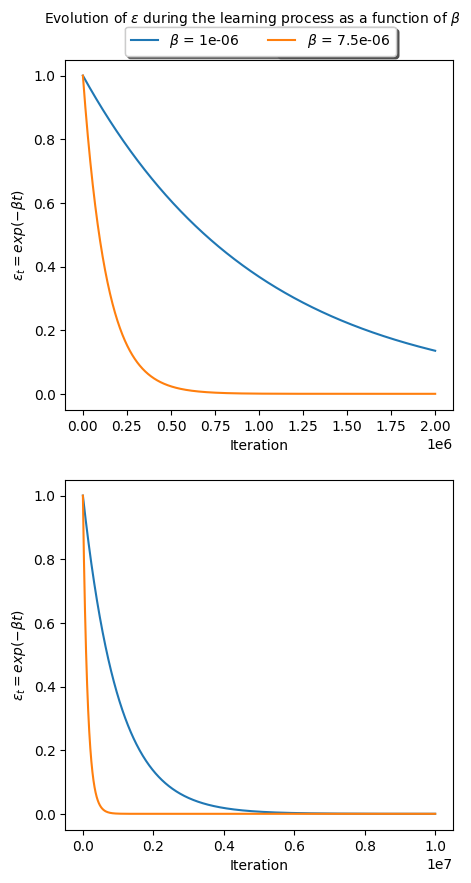

In [51]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))
fig.suptitle('Evolution of $\\epsilon$ during the learning process as a function of $\\beta$', fontsize=10, y=0.93)

# Flatten the axes for easier indexing
for beta in sorted([1.0e-06, 7.5e-06]):
    axes = axes.flatten()
    t0 = np.linspace(0,2*10**(6),1000)
    t1 = np.linspace(0,10**(7),1000)
    axes[0].plot(t0, np.exp(-beta*t0), label=f'$\\beta$ = {beta}')
    axes[1].plot(t1, np.exp(-beta*t1), label=f'$\\beta$ = {beta}')
    for i in [0,1]:
        axes[i].set_xlabel('Iteration', fontsize=10)
        axes[i].set_ylabel('$\\epsilon_t = exp(-\\beta t)$', fontsize=10)
        handles, labels = axes[0].get_legend_handles_labels()
        fig.legend(handles, labels, bbox_to_anchor=(0.8,0.92),fancybox=True, shadow=True, ncol=4, fontsize=10)
        


/var/folders/1v/lw80nwsd61d7sp0q_pzj0ppm0000gp/T/ipykernel_913/2545839581.py:6: RuntimeWarning: divide by zero encountered in log
  plt.plot(t, np.log(np.exp(-beta*t)/np.exp(-1.0e-05*t)), label=f"exp(-{beta}*t)/exp(-1.0e-05*t)")


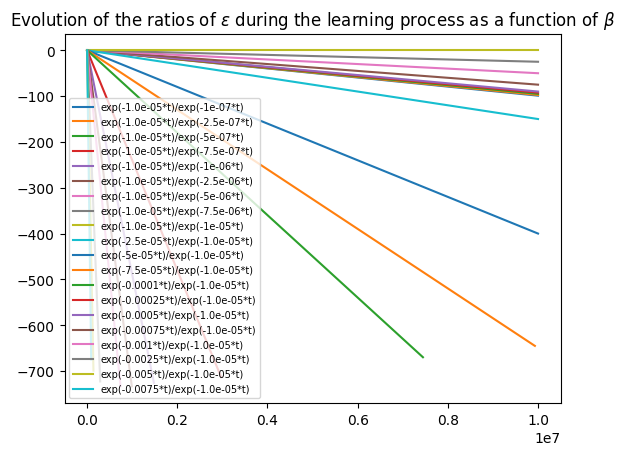

In [2]:
for beta in sorted([2.5e-03, 7.5e-07, 7.5e-04, 5.0e-07, 5.0e-05, 7.5e-05, 1.0e-03,
       5.0e-03, 7.5e-06, 5.0e-06, 1.0e-06, 7.5e-03, 2.5e-04, 5.0e-04, 2.5e-06,
       2.5e-07, 1.0e-07, 1.0e-04, 1.0e-05, 2.5e-05]):
    t = np.linspace(0,10**(7),1000)
    if beta > 1.0e-05:
        plt.plot(t, np.log(np.exp(-beta*t)/np.exp(-1.0e-05*t)), label=f"exp(-{beta}*t)/exp(-1.0e-05*t)")
    else: 
        plt.plot(t, np.log(np.exp(-1.0e-05*t)/np.exp(-beta*t)), label=f"exp(-1.0e-05*t)/exp(-{beta}*t)")
    plt.title('Evolution of the log-ratios of $\\epsilon$ during the learning process as a function of $\\beta$')
    plt.legend(fontsize=7, ncol = 1)

## Learing curves

In [3]:
sorted(df_same['beta'].unique())

[1e-07,
 2.5e-07,
 5e-07,
 7.5e-07,
 1e-06,
 2.5e-06,
 5e-06,
 7.499999999999999e-06,
 1e-05,
 2.5e-05,
 5e-05,
 7.500000000000001e-05,
 0.0001,
 0.00025,
 0.0005,
 0.00075,
 0.001,
 0.0025,
 0.005,
 0.0075]

In [7]:
def plot_learning_curves_subplots(lc_df, nb_iter, betas, nrows, ncols, figh=20, figl=20, loc_leg=(0.8, 0.96),y=1, title='Learning Curves for Different $\\beta$ Values'):
    # Create subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(figl, figh))
    fig.suptitle(title, fontsize=30,y=y)

    # Flatten the axes for easier indexing
    axes = axes.flatten()

    for i, beta in enumerate(betas):
        # Filter data for the specific beta
        mean_df = lc_df[lc_df['beta'] == beta].groupby('Iteration')[['Reward1', 'Reward2']].mean().reset_index()

        # Plot rewards for each player
        axes[i].plot(mean_df['Iteration'][mean_df['Iteration'] < nb_iter], mean_df['Reward1'][mean_df['Iteration'] < nb_iter],
                     alpha=0.5, label='Player 1')
        axes[i].plot(mean_df['Iteration'][mean_df['Iteration'] < nb_iter], mean_df['Reward2'][mean_df['Iteration'] < nb_iter],
                     alpha=0.5, label='Player 2')

        # Add horizontal lines for Collusion Profits and Nash Profits
        axes[i].axhline(y=0.34, color='r', linestyle='--', label='Collusion Profit')
        axes[i].axhline(y=0.23, color='g', linestyle='--', label='Nash Profit')

        # Customize the plot
        axes[i].set_title(f"$\\beta$={'{:.1e}'.format(beta)}", size=20)
        axes[i].set_xlabel('Iteration', fontsize=20)
        axes[i].set_ylabel('Rewards', fontsize=20)
        axes[i].xaxis.set_tick_params(labelsize=20)
        axes[i].xaxis.get_offset_text().set_fontsize(20)
        axes[i].yaxis.set_tick_params(labelsize=20)
        axes[i].grid(True)

    # Adjust layout for subplots
    plt.tight_layout(rect=[0, 0, 1, 0.96])


    # Create a combined legend using the axes of the last subplot
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=loc_leg,fancybox=True, shadow=True, ncol=4, fontsize=20)
   

    plt.show()

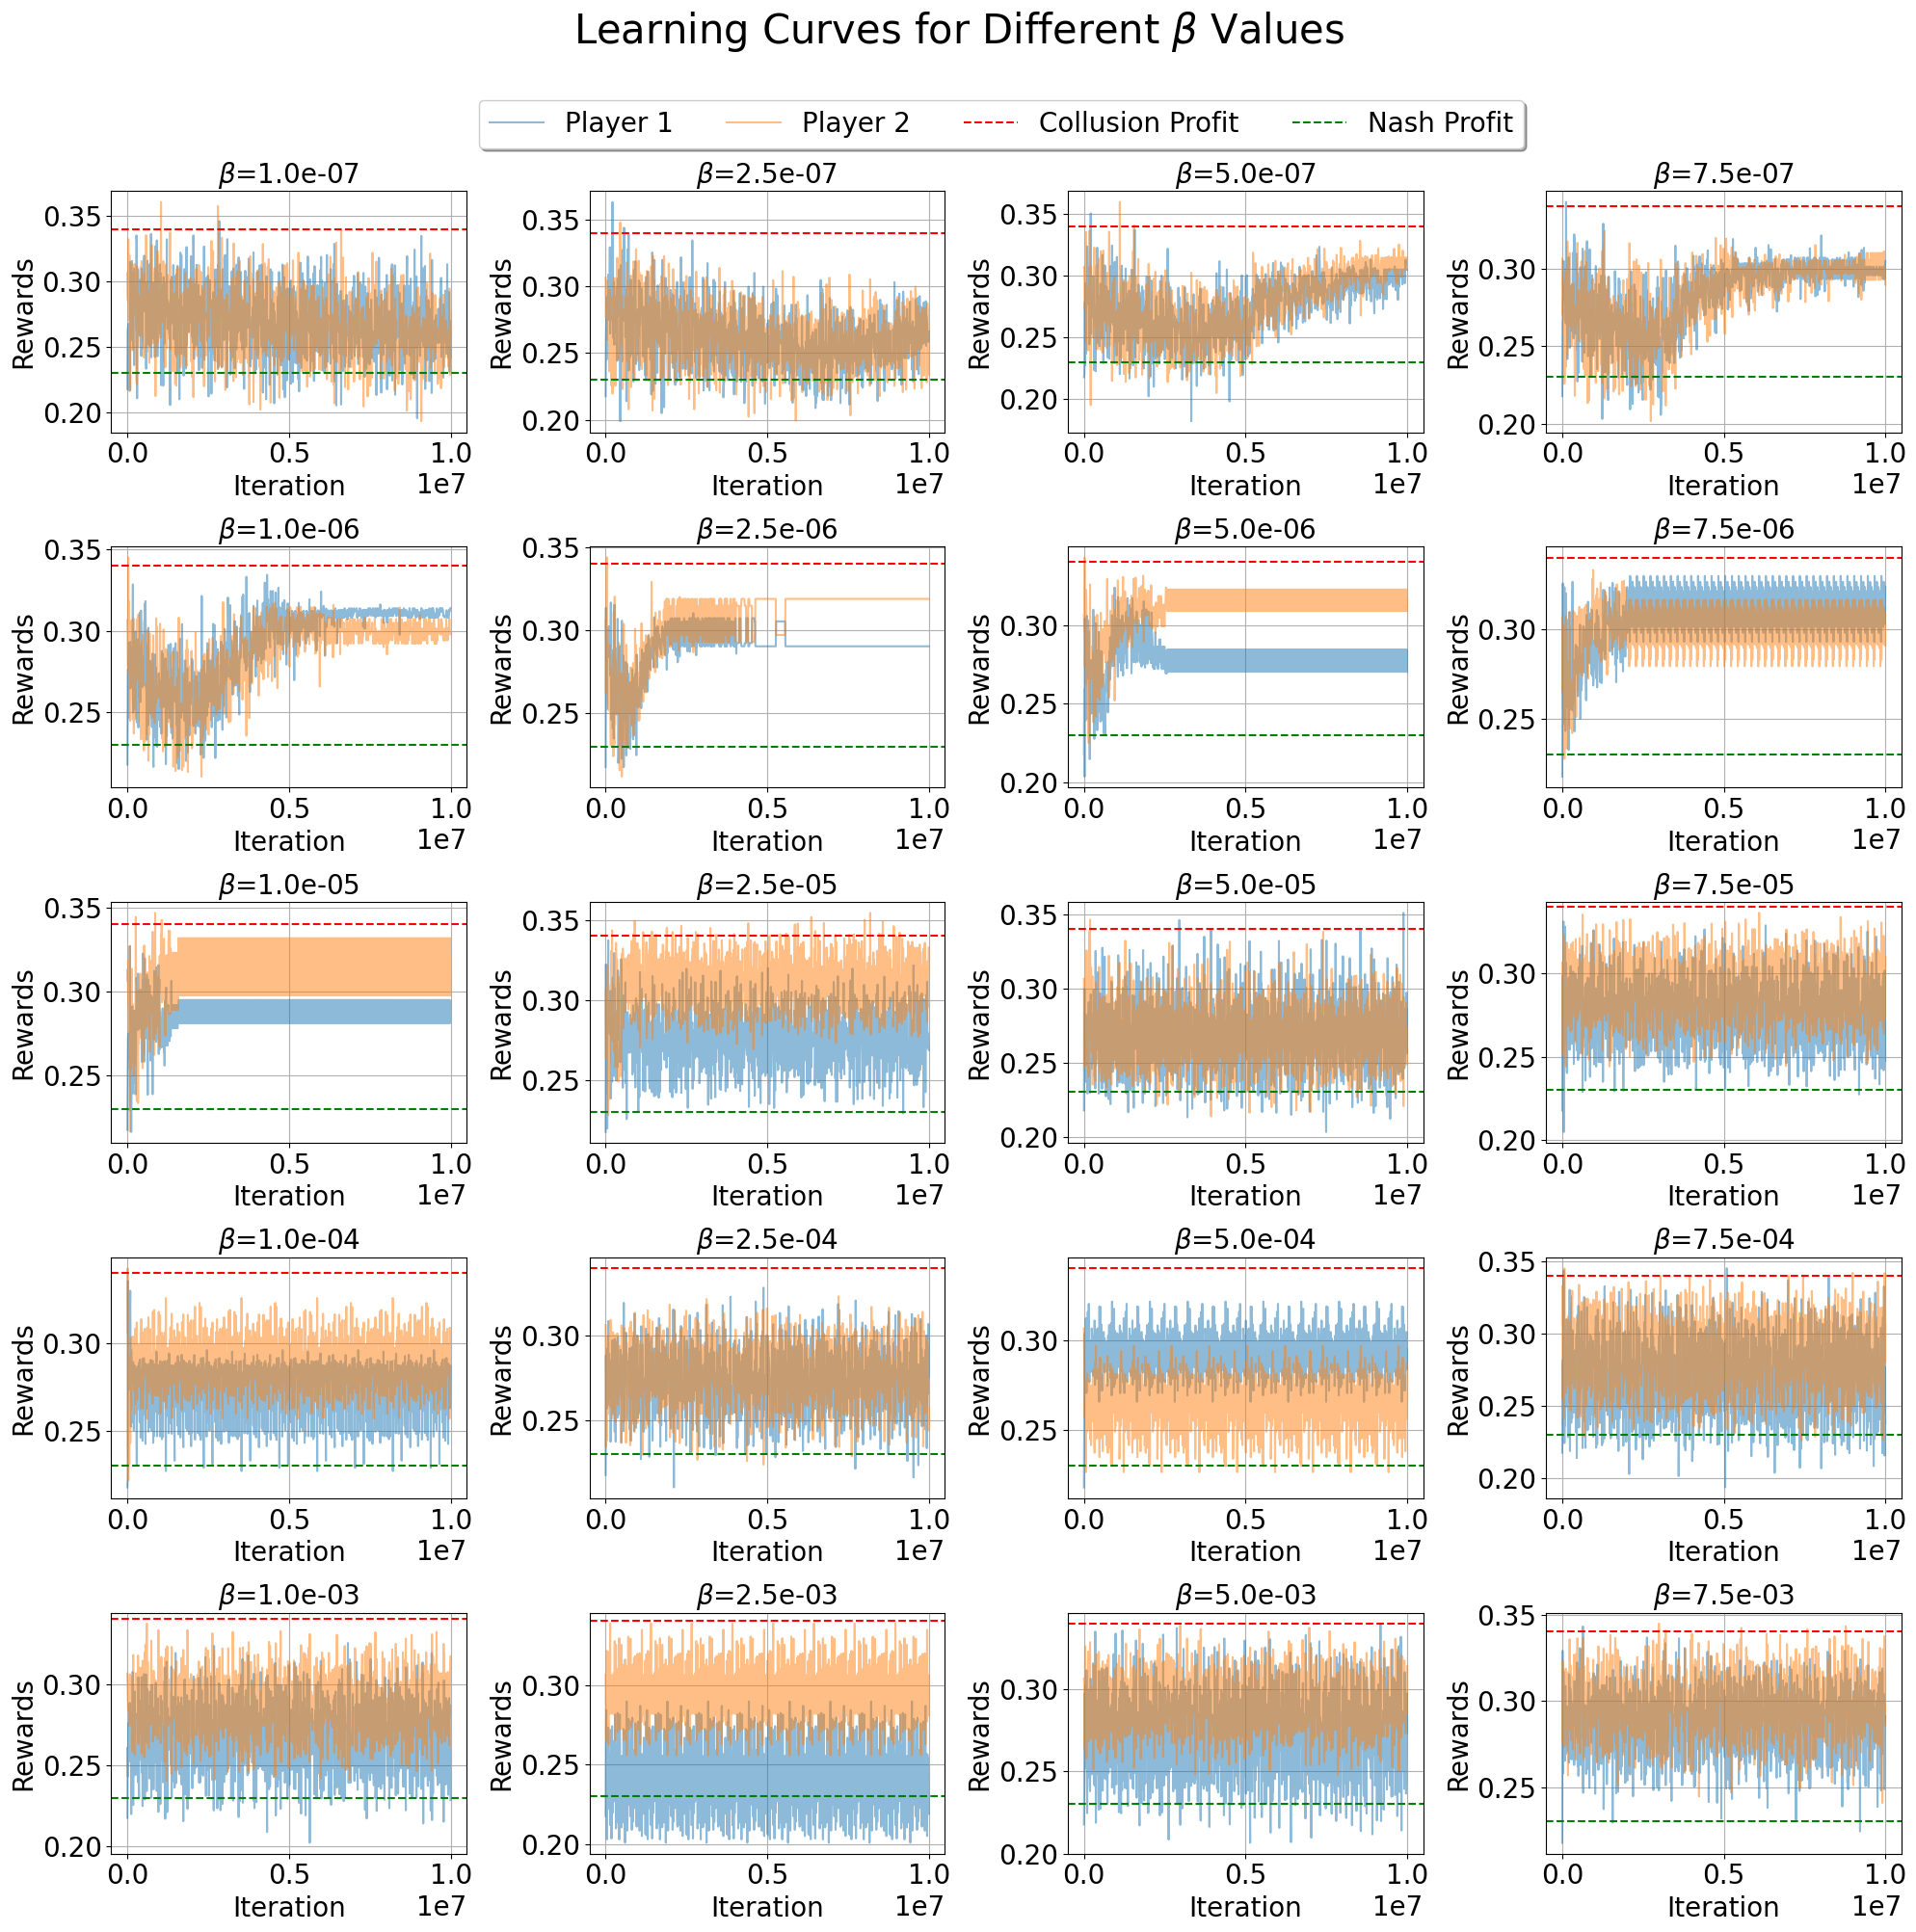

In [8]:
plot_learning_curves_subplots(lc_df_same,10**7,sorted(df_same['beta'].unique()),5,4)

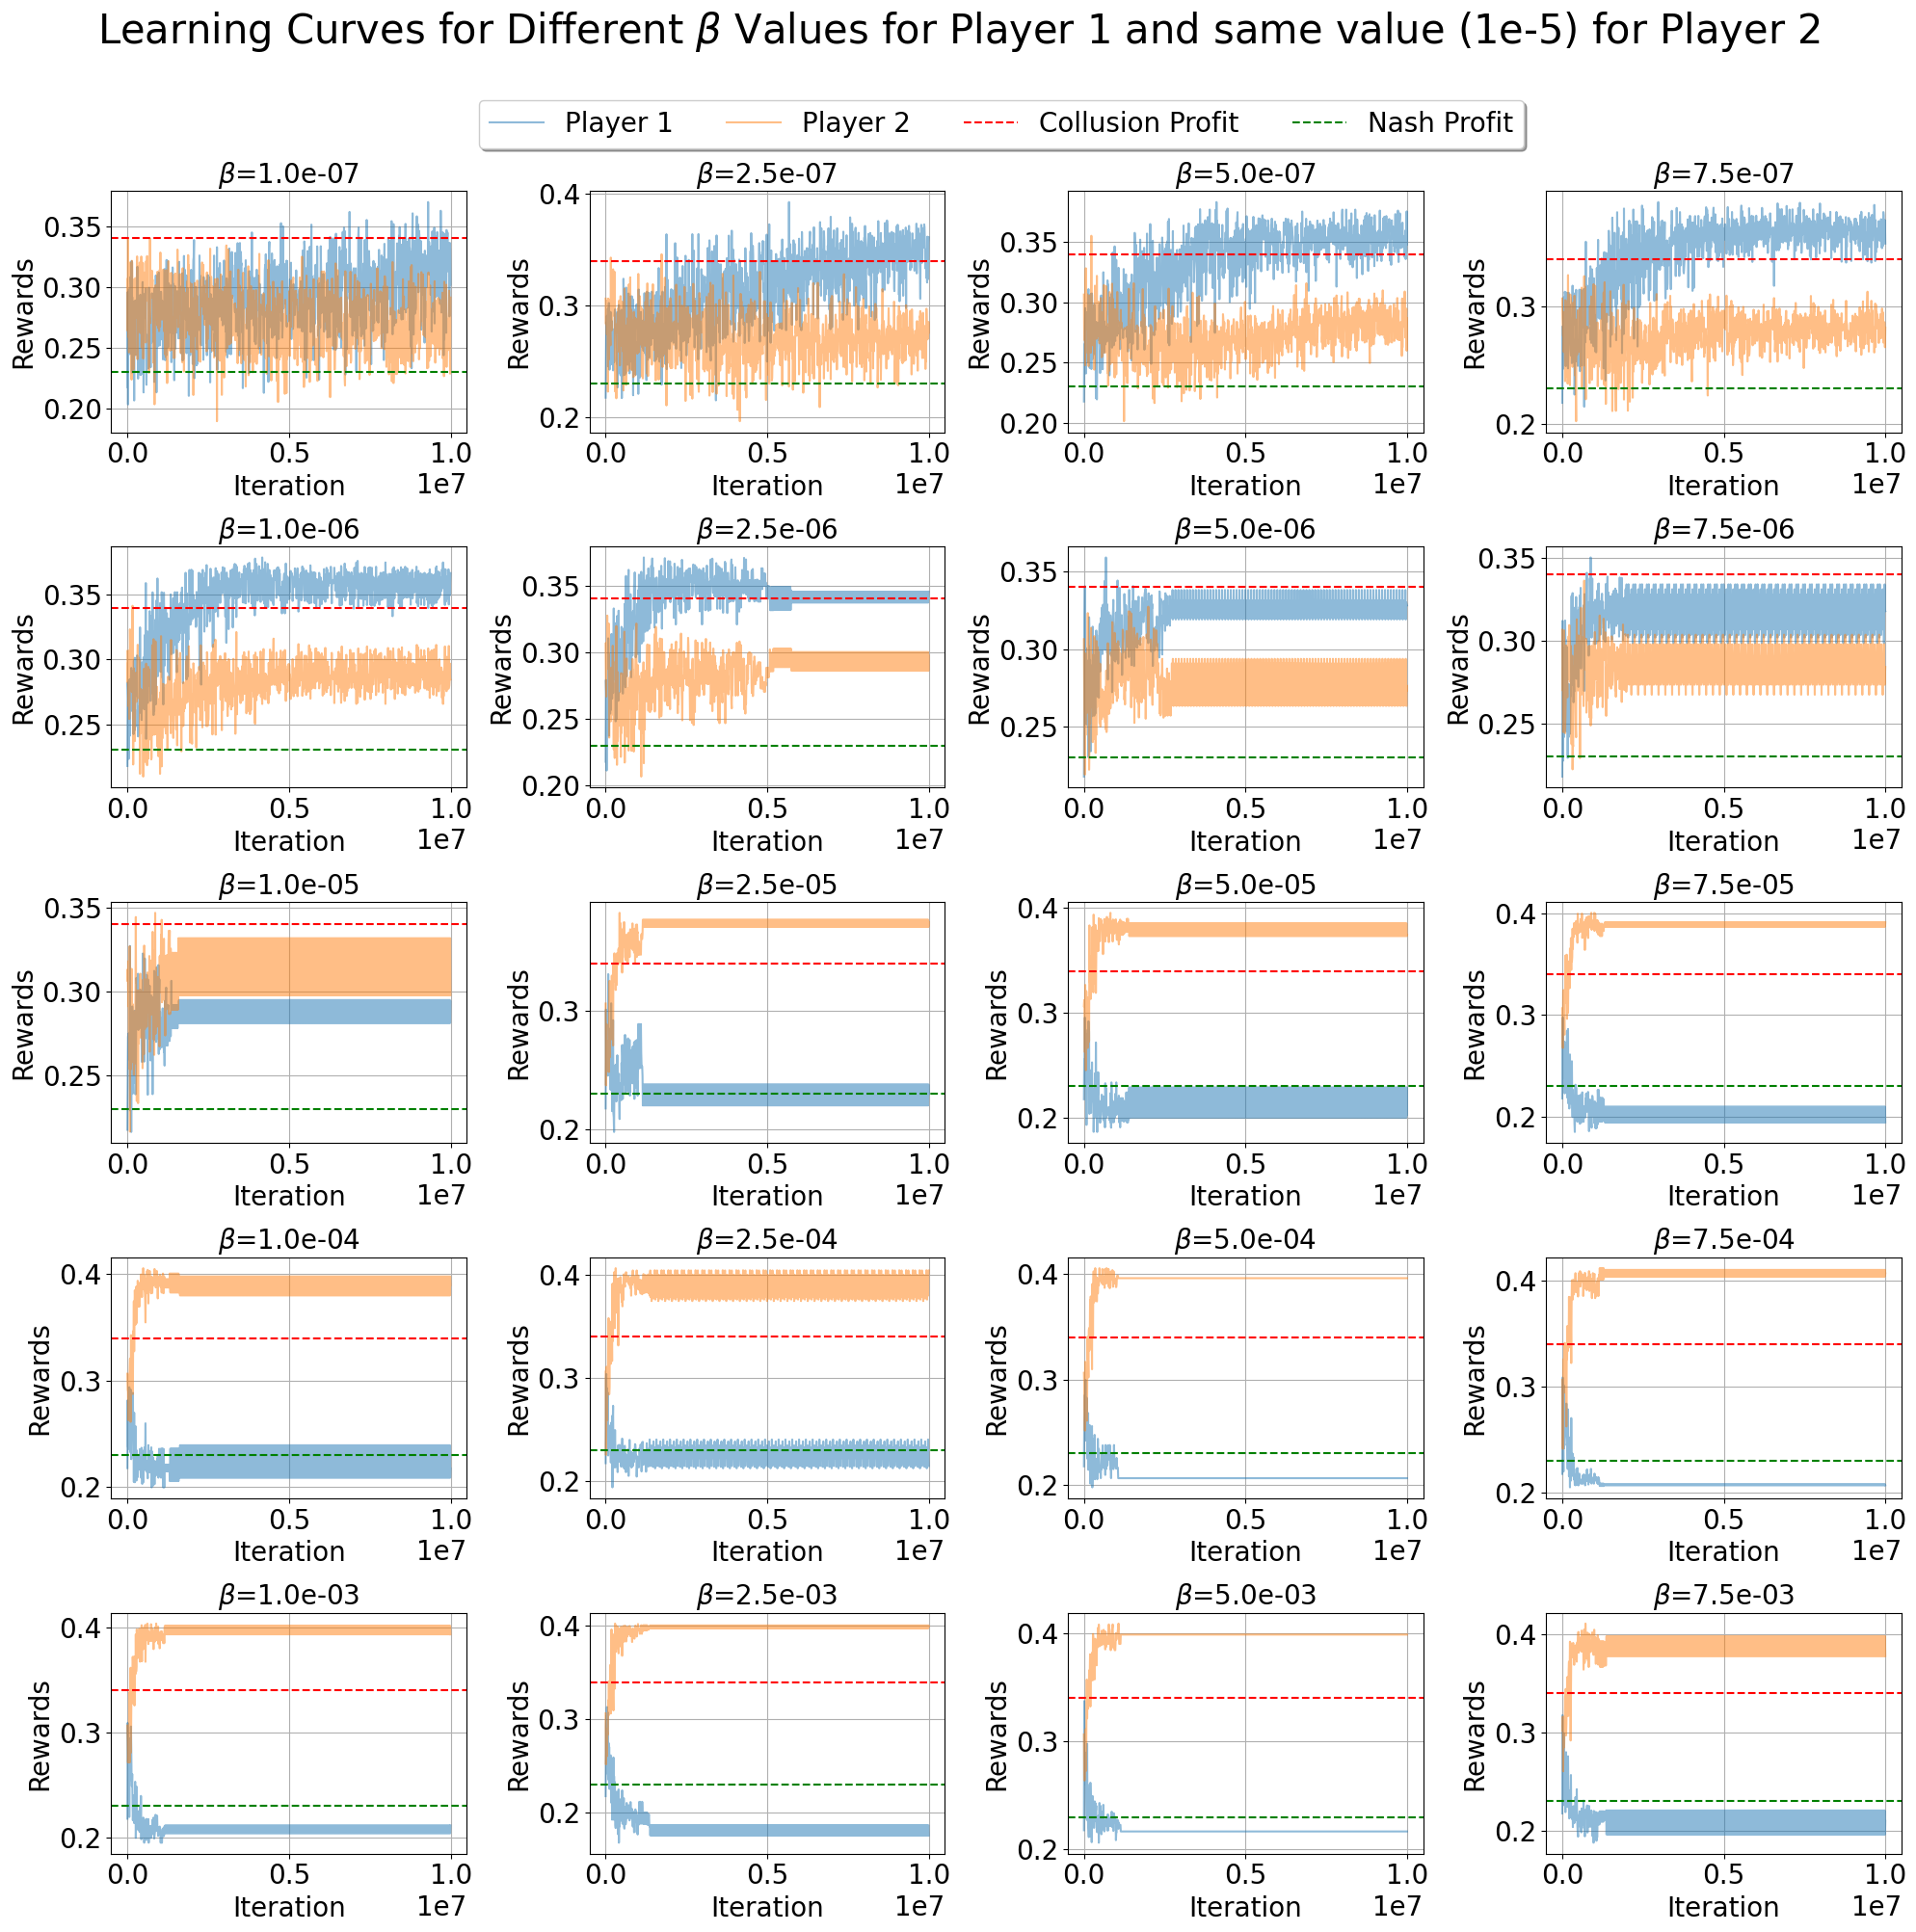

In [15]:
plot_learning_curves_subplots(lc_df_diff,10**7,sorted(df_same['beta'].unique()),5,4, title='Learning Curves for Different $\\beta$ Values for Player 1 and same value (1e-5) for Player 2')

In [49]:
def plot_learning_curves_subplots_newdatas(lc_df, nb_iter, betas, alphas, nrows, ncols, figh=20, figl=20, loc_leg=(0.8, 0.96),y=1, title='Learning Curves for Different $\\beta$ Values'):
    # Create subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(figl, figh))
    fig.suptitle(title, fontsize=30,y=y)

    # Flatten the axes for easier indexing
    axes = axes.flatten()

    i = 0

    for beta in betas:
        for alpha in alphas: 
            # Filter data for the specific beta
            mean_df = lc_df[(lc_df['beta'] == beta) & (lc_df['alpha']==alpha)][['iteration','Reward1', 'Reward2']]

            # Plot rewards for each player
            axes[i].plot(mean_df['iteration'][mean_df['iteration'] < nb_iter], mean_df['Reward1'][mean_df['iteration'] < nb_iter],
                        alpha=0.5, label='Player 1')
            axes[i].plot(mean_df['iteration'] [mean_df['iteration'] < nb_iter], mean_df['Reward2'][mean_df['iteration'] < nb_iter],
                        alpha=0.5, label='Player 2')

            # Add horizontal lines for Collusion Profits and Nash Profits
            axes[i].axhline(y=0.34, color='r', linestyle='--', label='Collusion Profit')
            axes[i].axhline(y=0.23, color='g', linestyle='--', label='Nash Profit')

            # Customize the plot
            axes[i].set_title(f"$\\alpha$={'{:.1e}'.format(alpha)}, $\\beta$={'{:.1e}'.format(beta)}", size=20)
            axes[i].set_xlabel('Iteration', fontsize=20)
            axes[i].set_ylabel('Rewards', fontsize=20)
            axes[i].xaxis.set_tick_params(labelsize=20)
            axes[i].xaxis.get_offset_text().set_fontsize(20)
            axes[i].yaxis.set_tick_params(labelsize=20)
            axes[i].grid(True)

            i += 1

    # Adjust layout for subplots
    plt.tight_layout(rect=[0, 0, 1, 0.96])


    # Create a combined legend using the axes of the last subplot
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=loc_leg,fancybox=True, shadow=True, ncol=4, fontsize=20)


    plt.show()

In [23]:
df_pricing_diff

,beta,alpha,iteration,Reward1,Reward2,std_1,std_2
0,0.000001,0.025,0,0.262635,0.240252,0.091602,0.101684
1,0.000001,0.025,999,0.256585,0.303286,0.072936,0.081011
2,0.000001,0.025,1999,0.313830,0.256590,0.084654,0.091486
3,0.000001,0.025,2999,0.278233,0.256782,0.093830,0.079103
4,0.000001,0.025,3999,0.284204,0.273233,0.095725,0.085654
...,...,...,...,...,...,...,...
37520,0.000020,0.200,1495999,0.357611,0.205213,0.038455,0.046224
37521,0.000020,0.200,1496999,0.367373,0.216004,0.034857,0.053856
37522,0.000020,0.200,1497999,0.348520,0.215335,0.048902,0.058518
37523,0.000020,0.200,1498999,0.354778,0.235582,0.048067,0.080096


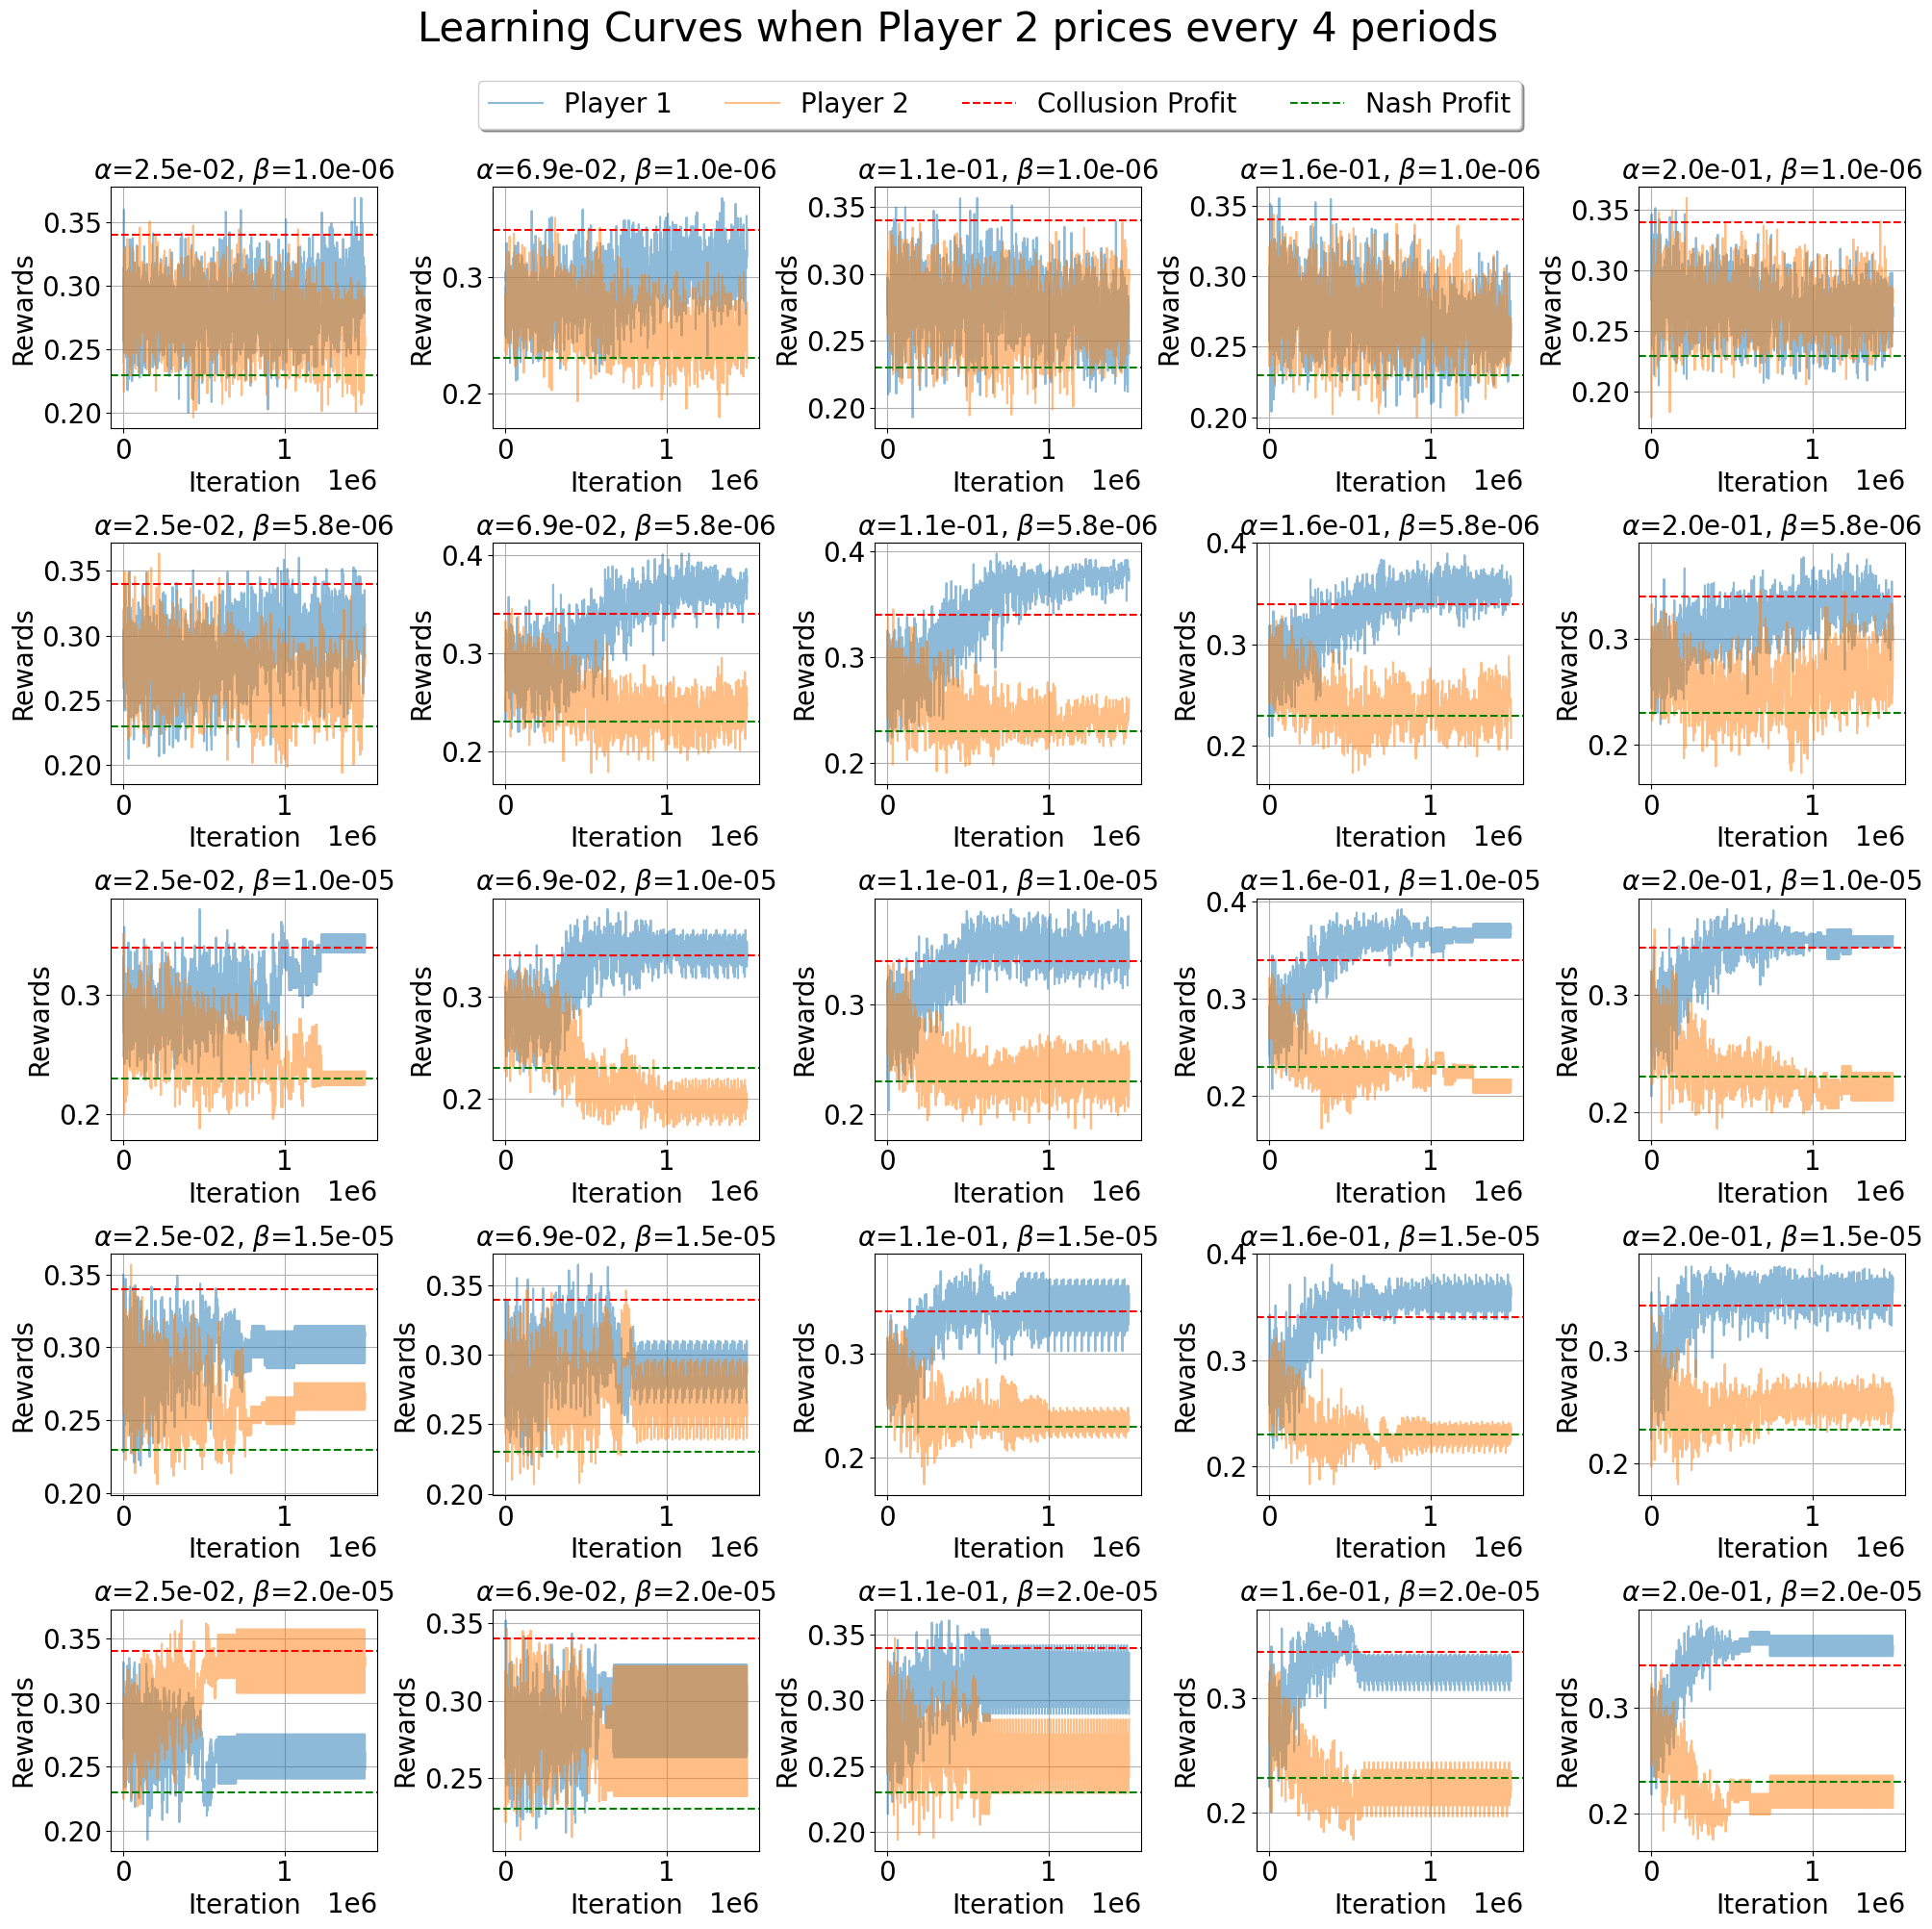

In [50]:
plot_learning_curves_subplots_newdatas(df_pricing_diff,0.2*10**7,betas=df_pricing_diff['beta'].unique().tolist(), alphas=df_pricing_diff['alpha'].unique().tolist(),nrows=5,ncols=5, figl=20, figh=20, loc_leg=(0.8,0.97),y=1.0, title='Learning Curves when Player 2 prices every 4 periods')

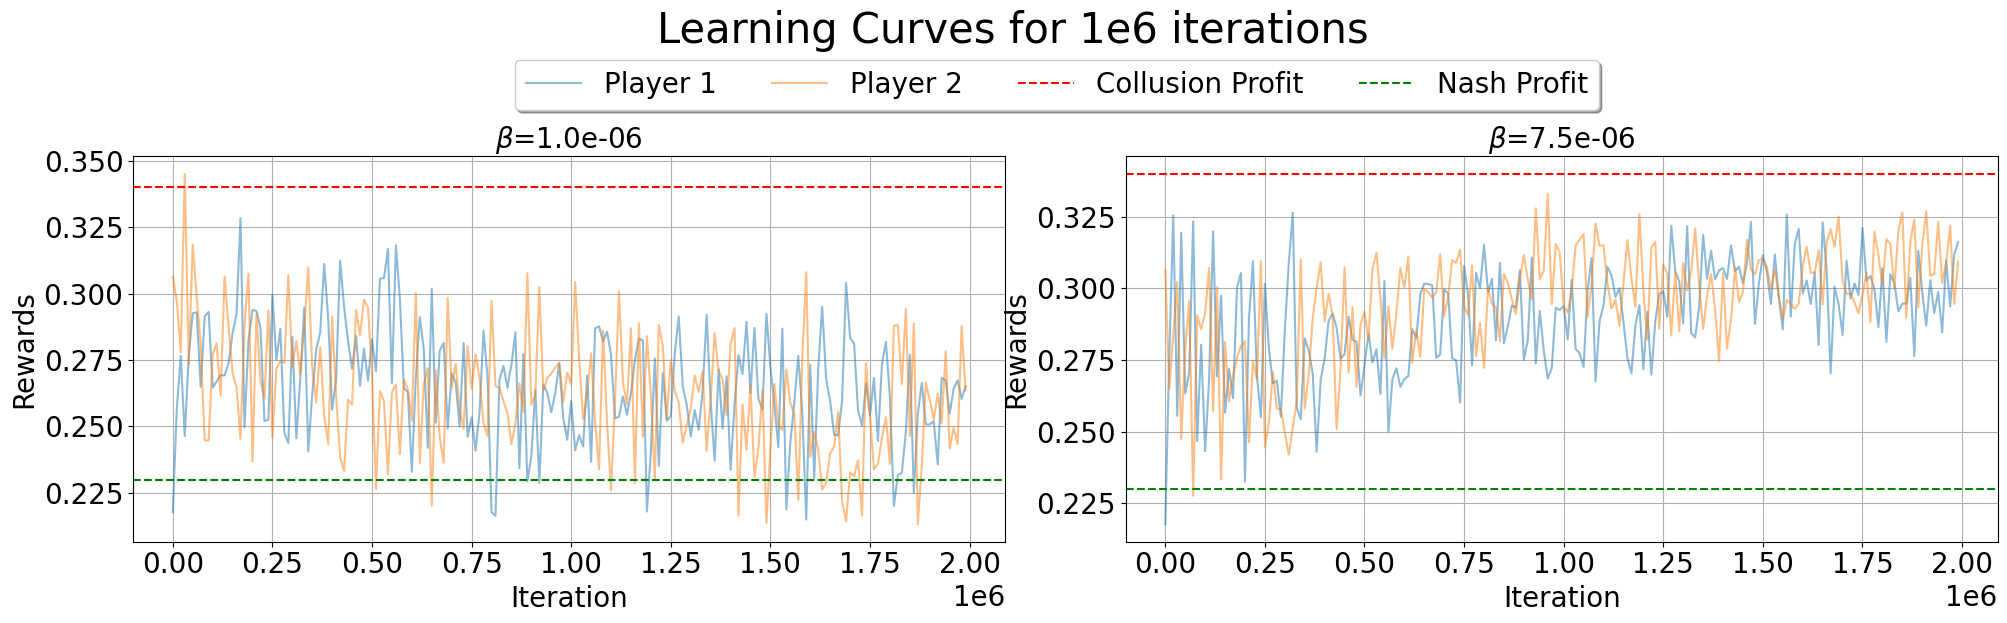

In [40]:
plot_learning_curves_subplots(lc_df_same,0.2*10**7,[1e-06,7.499999999999999e-06],1,2, figl=20, figh=6, loc_leg=(0.8,0.97),y=1.03, title='Learning Curves for 1e6 iterations')

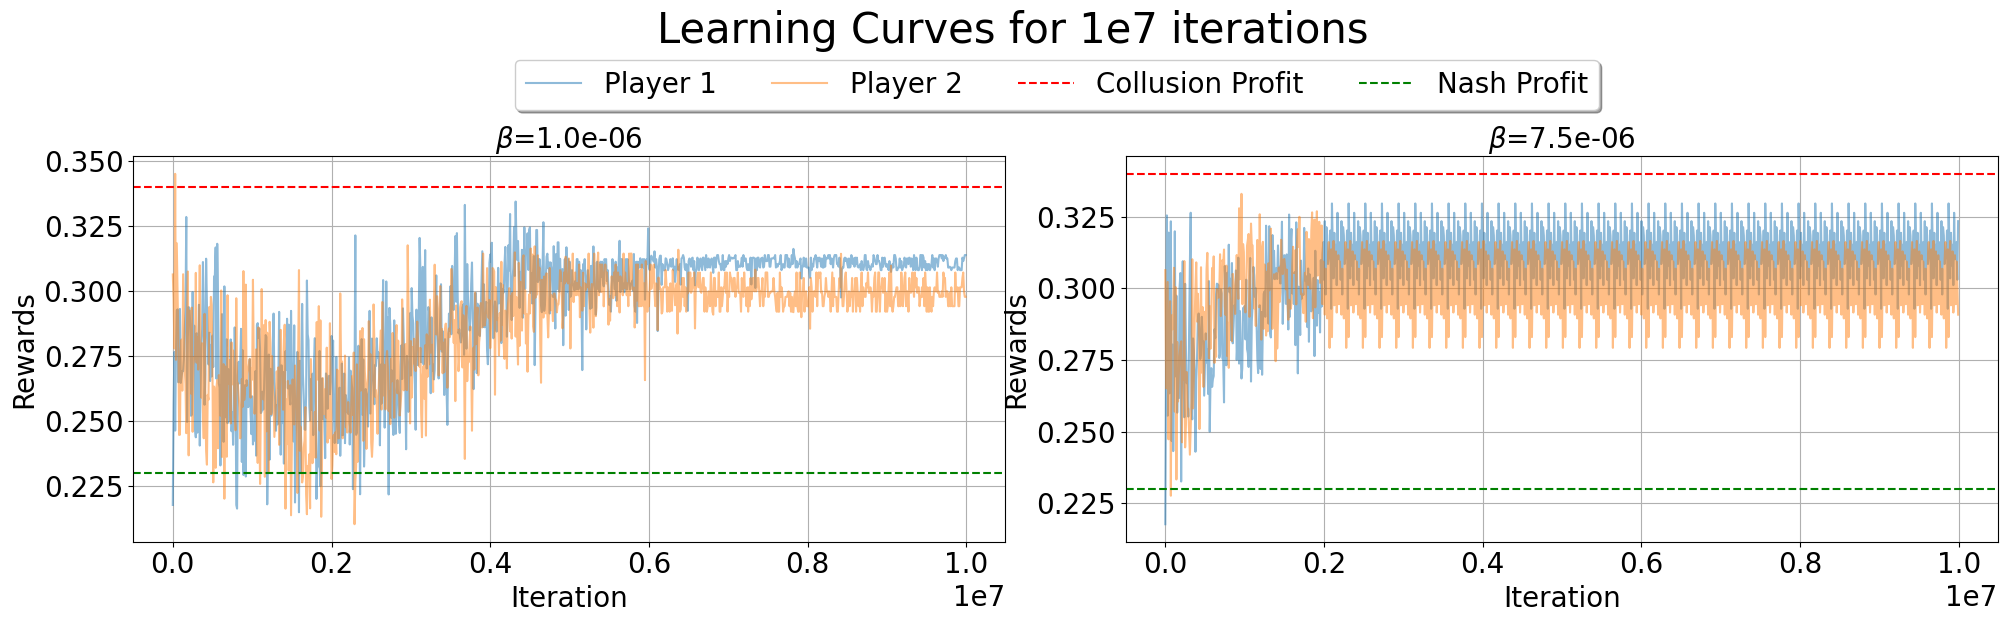

In [39]:
plot_learning_curves_subplots(lc_df_same,10**7,[1e-06,7.499999999999999e-06],1,2, figl=20, figh=6, loc_leg=(0.8,0.97),y=1.03, title= 'Learning Curves for 1e7 iterations')

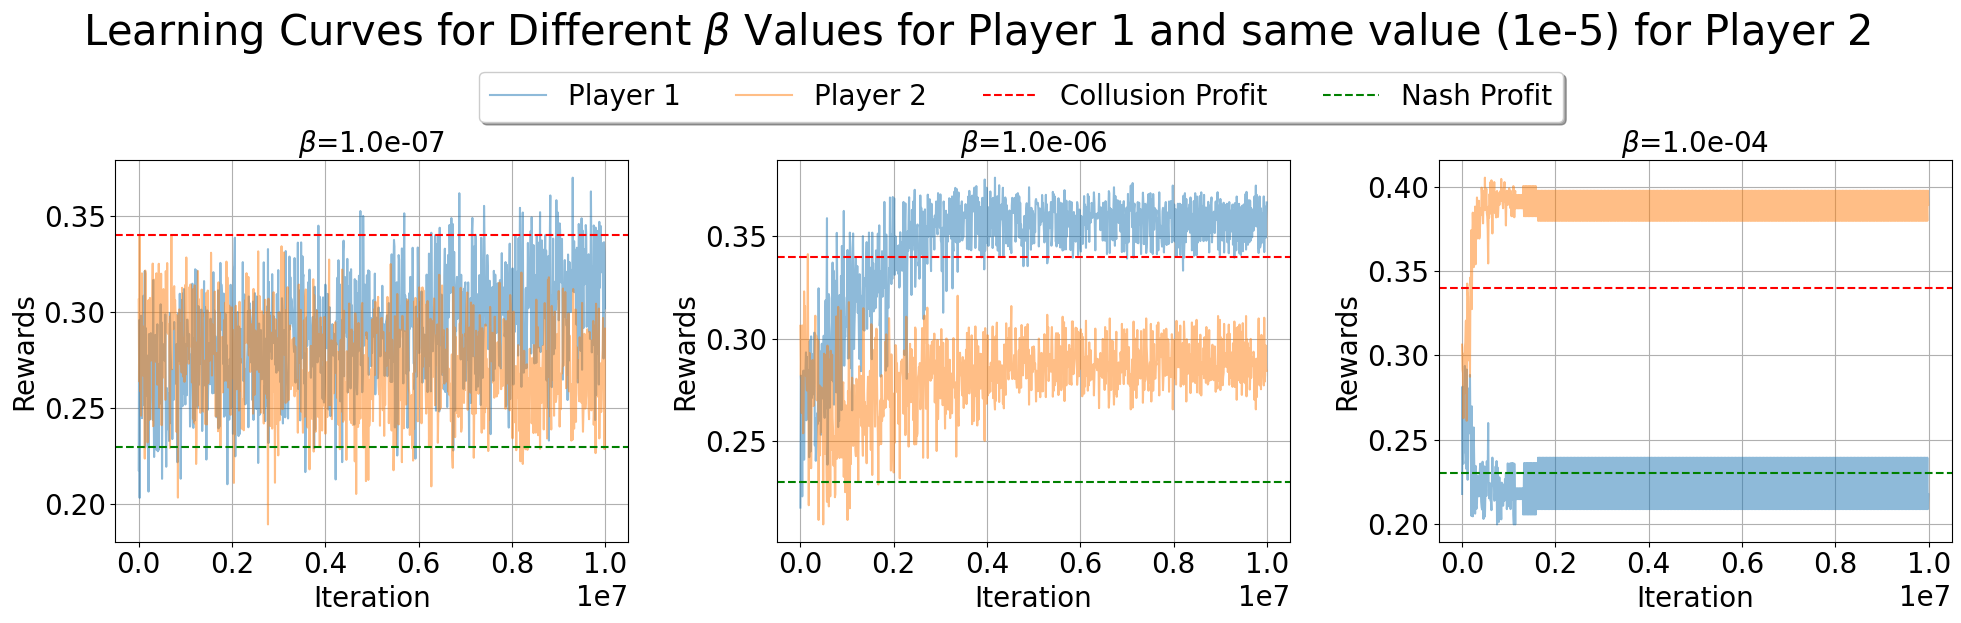

In [17]:
plot_learning_curves_subplots(lc_df_diff,10**7,[1e-07,1e-06,0.0001],1,3, figl=20, figh=6, loc_leg=(0.8,0.95),y=1.03, title='Learning Curves for Different $\\beta$ Values for Player 1 and same value (1e-5) for Player 2')

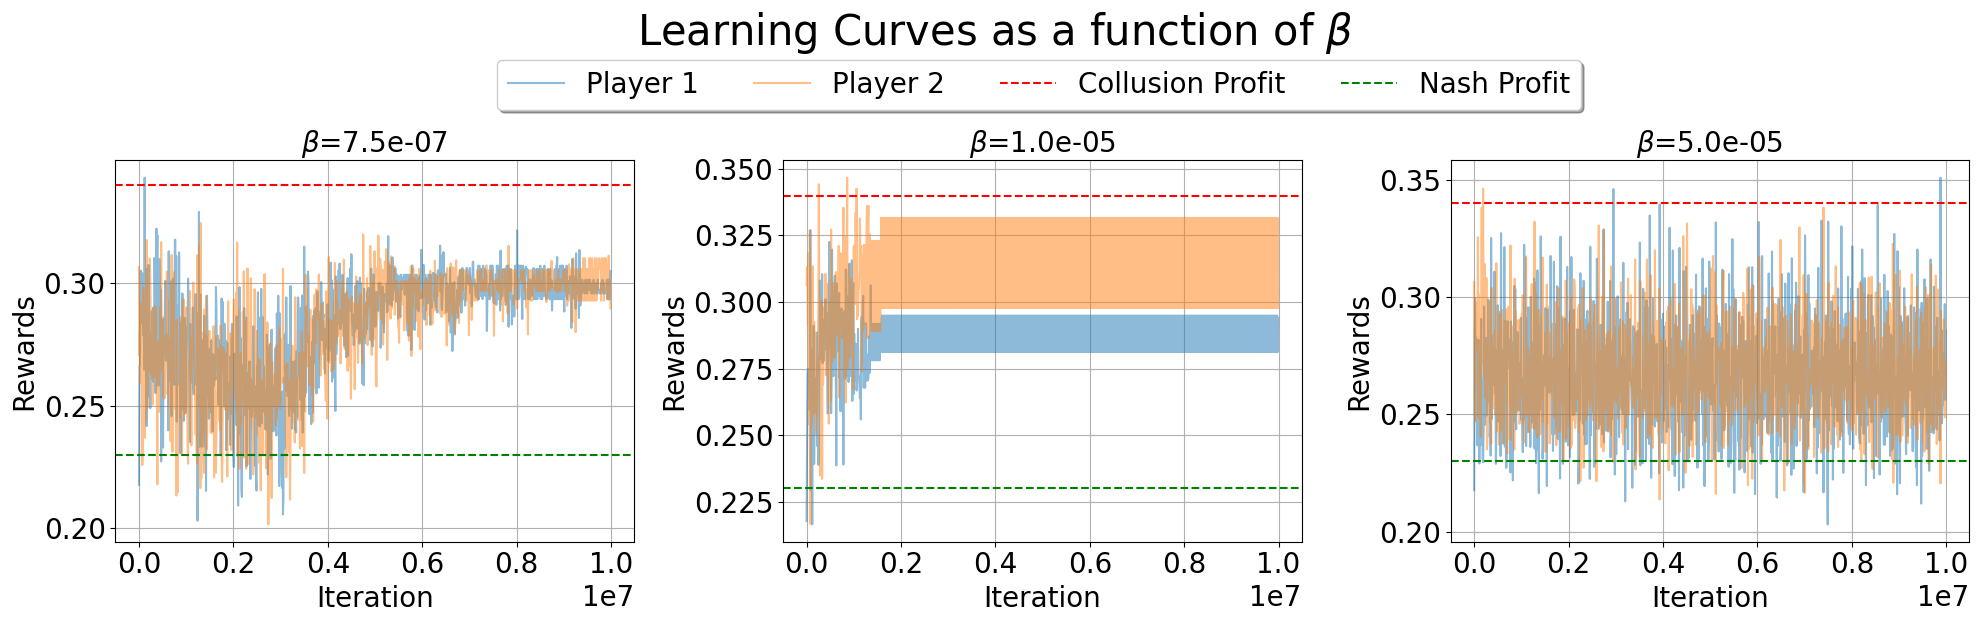

In [12]:
plot_learning_curves_subplots(lc_df_same,10**7,[7.5e-07,1e-05,5e-05],1,3, figl=20, figh=6, loc_leg=(0.8,0.97),y=1.03, title= 'Learning Curves as a function of $\\beta$')

## 3- Final rewards and prices as a function of beta

In [187]:
from matplotlib.legend_handler import HandlerBase
class HandlerBoxPlot(HandlerBase):
    def create_artists(self, legend, orig_handle,
                   xdescent, ydescent, width, height, fontsize,
                   trans):
        a_list = []
        a_list.append(Line2D(np.array([0, 0, 1, 1, 0])*width-xdescent, 
                                              np.array([0.25, 0.75, 0.75, 0.25, 0.25])*height-ydescent)) # box

        a_list.append(Line2D(np.array([0.5,0.5])*width-xdescent,
                                              np.array([0.75,1])*height-ydescent)) # top vert line

        a_list.append(Line2D(np.array([0.5,0.5])*width-xdescent,
                                              np.array([0.25,0])*height-ydescent)) # bottom vert line

        a_list.append(Line2D(np.array([0.25,0.75])*width-xdescent,
                                              np.array([1,1])*height-ydescent)) # top whisker

        a_list.append(Line2D(np.array([0.25,0.75])*width-xdescent,
                                              np.array([0,0])*height-ydescent)) # bottom whisker

        a_list.append(Line2D(np.array([0,1])*width-xdescent,
                                              np.array([0.5,0.5])*height-ydescent, lw=2)) # median
        for a in a_list:
            a.set_color(orig_handle.get_color())
        return a_list

In [287]:
def repart_rewards(df_beta, title='Box Plots of final rewards for Different $\\beta$ values'):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 7))
    
    # Sort the dataframe by 'beta' column in ascending order
    df_beta_sorted = df_beta.sort_values(by='beta')

    
    sns.boxplot(x='beta', y=df_beta_sorted['Reward1'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])
    sns.boxplot(x='beta', y=df_beta_sorted['Reward2'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])

    plt.axhline(y=0.34, color='r', linestyle='--', label='Collusion Profits')
    plt.axhline(y=0.23, color='g', linestyle='--', label='Nash Profits')
    
    plt.xlabel('Beta', fontsize=15)
    plt.ylabel('Final rewards', fontsize=15)
    plt.title(title, fontsize=15, y=1.1)
    # Ajouter la légende manuellement
    
    # Define custom tick labels for the x-axis
    beta_values = df_beta_sorted['beta'].unique()
    beta_labels = ['{:.1e}'.format(beta) for beta in beta_values]

    #Define the legend
    l1 = Line2D([0], [0], color='C0')
    l2 = Line2D([0], [0], color='C1')
    l3 = Line2D([0], [0], color='r', linestyle='--')
    l4 = Line2D([0], [0], color='g', linestyle='--')

    plt.legend([l1, l2, l3, l4], ["Player 1", "Player 2", "Collusion Profit", "Nash Profit"], handler_map={l1:HandlerBoxPlot(), l2:HandlerBoxPlot()}, handleheight=3, bbox_to_anchor=(0.84,1.1), ncol=4, fontsize=10)
    
    # Set custom tick positions and labels on the x-axis and y-axis
    plt.xticks(ticks=range(len(beta_values)), labels=beta_labels, rotation=45, fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

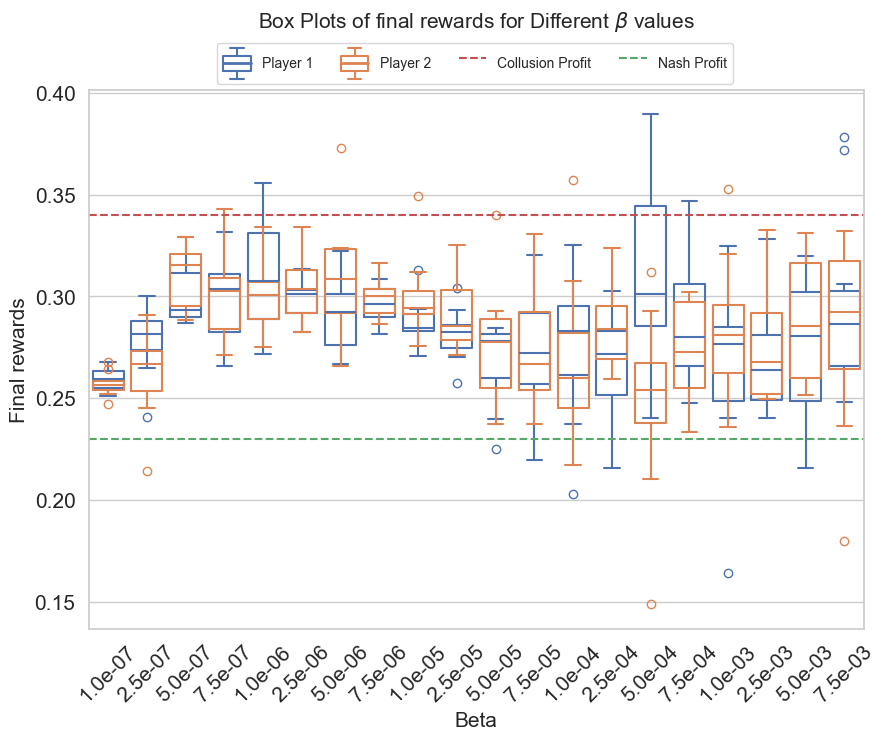

In [288]:
repart_rewards(fin_df_same)

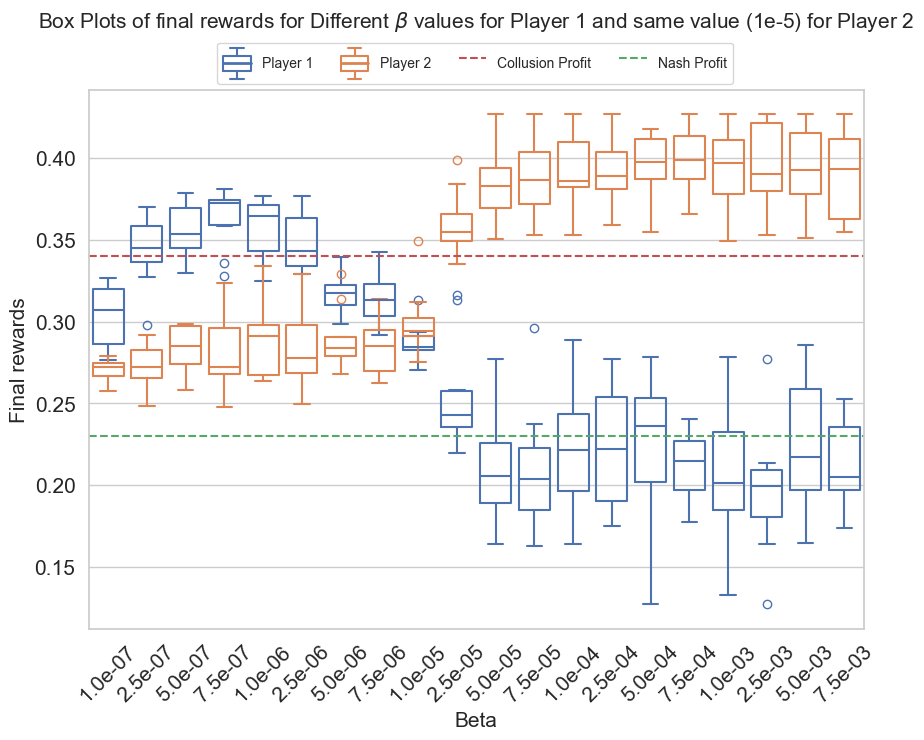

In [289]:
repart_rewards(fin_df_diff, title = "Box Plots of final rewards for Different $\\beta$ values for Player 1 and same value (1e-5) for Player 2")

# One agent price more often than the other

## Have a look on what punishement is really 

In [28]:
import numpy as np
import matplotlib.pyplot as plt

#.py
from core import qlearning2 as q
from core import best_response_grid as br

In [1]:
def after_training_react_inc(Q_table_player1, Q_table_player2, nb_sim=15):
    agents = [q.Agent() for _ in range(2)]
    env = q.Env()
    agents[0].Q = Q_table_player1
    agents[1].Q = Q_table_player2

    game_rewards = []

    rewards = []  # Store rewards for each game simulation step
    prices = []
    
    # Game simulation
    for t in range(nb_sim):  # Change the number of steps if necessary
        if t == 9: 
            # Agents' actions (deterministic policy)
            agents[0].a_ind = agents[0].Q[:, agents[0].s_ind].argmax() # This changes, we no longer use epsilon-greedy 
            agents[1].a_ind = agents[1].m - 1 #increases its price
            
            # Next state and reward
            s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
            ret = env(s_t1)
            quant, price, cost = ret

            re = ret[0]*ret[1]-ret[0]*ret[2]
            rewards.append(re)
            prices.append(price)
            
            # Update state for the next step
            s_t = s_t1
            for agent in agents:
                agent.s_t = s_t
            s_ind1 = agents[0].find_index(s_t1)
            for agent in agents:
                agent.s_ind1 = s_ind1
        
            for i, agent in enumerate(agents):
                agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)
            
        else:
            # Agents' actions (deterministic policy)
            for agent in agents:
                agent.a_ind = agent.Q[:, agent.s_ind].argmax() # This changes, we no longer use epsilon-greedy 
            
            # Next state and reward
            s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
            ret = env(s_t1)
            quant, price, cost = ret

            re = ret[0]*ret[1]-ret[0]*ret[2]
            rewards.append(re)
            prices.append(price)
            
            # Update state for the next step
            s_t = s_t1
            for agent in agents:
                agent.s_t = s_t
            s_ind1 = agents[0].find_index(s_t1)
            for agent in agents:
                agent.s_ind1 = s_ind1
        
            for i, agent in enumerate(agents):
                agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)
        

    print(f"Rewards: {rewards}")
    print(f"Prices: {prices}")

    non_dev_p = []
    dev_p = []
    for i in range(len(prices)):
        non_dev_p.append(prices[i][0])
        dev_p.append(prices[i][1])
    plt.plot(range(len(prices)),non_dev_p, label=f"Non-Deviating agent", marker='^',alpha=0.5)
    plt.plot(range(len(prices)), dev_p, label=f"Deviating agent", marker='s', alpha=0.5)

    plt.xlabel("Iterations")
    plt.ylabel("Prices")
    plt.title("Prices as function of time")
    plt.legend()
    plt.show()

In [2]:
def after_training_react_dec(Q_table_player1, Q_table_player2, nb_sim=15):
    agents = [q.Agent() for _ in range(2)]
    env = q.Env()
    agents[0].Q = Q_table_player1
    agents[1].Q = Q_table_player2

    rewards = []  # Store rewards for each game simulation step
    prices = []
    
    # Game simulation
    for t in range(nb_sim):  # Change the number of steps if necessary
        if t == 9: 
            # Agents' actions (deterministic policy)
            agents[0].a_ind = agents[0].Q[:, agents[0].s_ind].argmax() # This changes, we no longer use epsilon-greedy 
            agents[1].a_ind = 0 #decreases its price
            
            # Next state and reward
            s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
            ret = env(s_t1)
            quant, price, cost = ret

            re = ret[0]*ret[1]-ret[0]*ret[2]
            rewards.append(re)
            prices.append(price)
            
            # Update state for the next step
            s_t = s_t1
            for agent in agents:
                agent.s_t = s_t
            s_ind1 = agents[0].find_index(s_t1)
            for agent in agents:
                agent.s_ind1 = s_ind1
        
            for i, agent in enumerate(agents):
                agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)
            
        else:
            # Agents' actions (deterministic policy)
            for agent in agents:
                agent.a_ind = agent.Q[:, agent.s_ind].argmax() # This changes, we no longer use epsilon-greedy 
            
            # Next state and reward
            s_t1 = env([agent.A[agent.a_ind] for agent in agents])[1]
            ret = env(s_t1)
            quant, price, cost = ret

            re = ret[0]*ret[1]-ret[0]*ret[2]
            rewards.append(re)
            prices.append(price)
            
            # Update state for the next step
            s_t = s_t1
            for agent in agents:
                agent.s_t = s_t
            s_ind1 = agents[0].find_index(s_t1)
            for agent in agents:
                agent.s_ind1 = s_ind1
        
            for i, agent in enumerate(agents):
                agent.updateQ(q=quant[i], p=price[i], c=cost[i], t=t)
        

    print(f"Rewards: {rewards}")
    print(f"Prices: {prices}")

    non_dev_p = []
    dev_p = []
    for i in range(len(prices)):
        non_dev_p.append(prices[i][0])
        dev_p.append(prices[i][1])
    plt.plot(range(len(prices)),non_dev_p, label=f"Non-Deviating agent", marker='^',alpha=0.5)
    plt.plot(range(len(prices)), dev_p, label=f"Deviating agent", marker='s', alpha=0.5)

    plt.xlabel("Iterations")
    plt.ylabel("Prices")
    plt.title("Prices as function of time")
    plt.legend()
    plt.show()

In [2]:
import pandas as pd

In [2]:
Q_same = pd.read_csv('../final_data/Q_same_beta.csv')

In [3]:
def sep_Qcount_Qtable(Q):  
    # Liste pour stocker les dataframes
    dfs = []

    # Boucle pour extraire les parties de 15 lignes
    for i in range(0, len(Q), 15):
        chunk = Q.iloc[i:i + 15]
        dfs.append(chunk)

    Q_count = pd.concat([df for i, df in enumerate(dfs) if i % 2 == 0], ignore_index=True)
    Q_table = pd.concat([df for i, df in enumerate(dfs) if i % 2 != 0], ignore_index=True)
    return Q_count, Q_table

In [4]:
Q_count_same, Q_table_same = sep_Qcount_Qtable(Q_same)

In [5]:
Q_count_same

,0,1,2,3,4,5,6,7,8,9,...,217.1,218.1,219.1,220.1,221.1,222.1,223.1,224.1,beta,index
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0010,1
1,0.0,1.0,1.0,8.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0010,1
2,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0010,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0010,1
4,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,1.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,1.0,1.0,0.0,0.0,5.0,0.0,0.0,1.0,...,0.0,41.0,1.0,68.0,1.0,0.0,0.0,3.0,0.0005,10
2996,0.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0005,10
2997,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0005,10
2998,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3.0,2.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0005,10


In [6]:
for i in range(0, len(Q_count_same), 15):
    Q_count_same['nrow'] = Q_count_same.index % 15

In [7]:
Q_count_same

,0,1,2,3,4,5,6,7,8,9,...,218.1,219.1,220.1,221.1,222.1,223.1,224.1,beta,index,nrow
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0010,1,0
1,0.0,1.0,1.0,8.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0010,1,1
2,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0010,1,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0010,1,3
4,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0010,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,0.0,1.0,1.0,0.0,0.0,5.0,0.0,0.0,1.0,...,41.0,1.0,68.0,1.0,0.0,0.0,3.0,0.0005,10,10
2996,0.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0005,10,11
2997,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,...,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0005,10,12
2998,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,2.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0005,10,13


In [8]:
mean_Q_count = Q_count_same.groupby(['beta', 'nrow']).mean()

In [9]:
mean_Q_count = mean_Q_count.drop(columns=['index'])

In [10]:
mean_Q_count.iloc[:, : 225]

0       1       2       3       4       5       6  \
beta         nrow                                                           
1.000000e-07 0     2577.9  3382.7  3979.0  4135.7  3757.3  3161.9  2613.2   
             1     3573.6  5012.1  5986.1  5859.0  5145.3  4351.3  3569.1   
             2     4488.2  6414.9  7593.1  7515.1  6558.6  5600.8  4362.8   
             3     4854.6  6771.9  8174.0  7884.8  7098.3  5647.4  4546.2   
             4     4334.1  6173.7  7370.5  7379.3  6483.6  5480.7  4346.8   
...                   ...     ...     ...     ...     ...     ...     ...   
7.500000e-03 10       0.0     0.0     0.1     0.0     0.1     0.2     0.4   
             11       0.3     0.4     0.0     0.0     0.0     3.1     0.1   
             12       0.1     0.0     0.3     0.0     0.1     0.1     0.0   
             13       0.0     0.1     0.0     0.0     0.0     0.0     0.2   
             14       0.6     0.2     0.2     0.2     0.0     0.0     0.2   

                          7       8       9  ...     215     216       217  \
beta         nrow                            ...                             
1.000000e-07 0       2174.5  1943.5  1692.9  ...  2275.3  1831.8    1585.8   
             1       2929.1  2505.0  2154.1  ...  2966.8  2521.2    1979.0   
             2       3516.1  2996.1  2735.3  ...  3766.4  3057.5    2488.5   
             3       3837.3  3241.3  2914.1  ...  3935.3  3280.1    2660.5   
             4       3571.3  3093.1  2824.6  ...  3849.4  3123.0    2591.4   
...                     ...     ...     ...  ...     ...     ...       ...   
7.500000e-03 10         0.0     0.8     1.7  ...     0.0     0.4  111106.9   
             11         0.3     0.0     0.1  ...     0.1     0.0       0.0   
             12    142848.1     0.2     0.0  ...     0.0     0.0       0.0   
             13         0.1     0.3     0.1  ...     0.3     0.0       0.1   
             14         0.4     0.3     0.4  ...     0.1     0.3       0.2   

                      218     219       220     221     222     223     224  
beta         nrow                                                            
1.000000e-07 0     1383.3  1296.9    1209.9  1192.8  1167.8  1199.1  1166.3  
             1     1733.9  1570.1    1489.8  1442.9  1435.5  1439.9  1480.4  
             2     2031.1  1892.6    1778.3  1726.2  1704.1  1700.9  1771.6  
             3     2180.1  2084.0    1925.2  1822.8  1884.7  1882.5  1818.6  
             4     2168.4  1937.5    1927.8  1885.4  1821.0  1790.9  1822.6  
...                   ...     ...       ...     ...     ...     ...     ...  
7.500000e-03 10       0.1     0.1       0.0     0.0     0.0     0.0     0.9  
             11       0.2     0.0       0.2     0.0     1.5     0.2     0.0  
             12       0.1     0.7  166647.2     0.8     0.1     0.2     0.0  
             13       0.0     0.1       0.3     0.0     0.1     0.0     0.0  
             14       0.1     0.2       0.1     0.0     0.0     0.1     0.0  

[300 rows x 225 columns]

In [21]:
# Assuming your data frame is named df
def Q_count_into_flatten(df):
    betas = df.index.get_level_values('beta').unique().to_list()
    beta_dict = {}

    for beta in betas:
        beta_values = df[df.index.get_level_values('beta') == beta].reset_index().melt(id_vars=['nrow','beta'])
        beta_values = beta_values[beta_values.variable!='beta'].reset_index()
        beta_values = beta_values.drop(columns='index')
        beta_dict[beta] = beta_values

    return beta_dict

In [25]:
dct_for_hist_player1 = Q_count_into_flatten(mean_Q_count.iloc[:,:225])
dct_for_hist_player2 = Q_count_into_flatten(mean_Q_count.iloc[:,225:])
dct_for_hist = {}
##c'est encore des dict faire pour chaque état
for key in dct_for_hist_player1.keys():
    dct_for_hist[key] = pd.merge(dct_for_hist_player1[key], dct_for_hist_player2[key]['value'], left_index=True, right_index=True)
    dct_for_hist[key] = dct_for_hist[key].rename(columns={'nrow': 'action', 'variable': 'state', 'value_x':'Player1', 'value_y':'Player2'})
    dct_for_hist[key]['number of time visited (mean)'] = dct_for_hist[key][['Player1', 'Player2']].mean(axis=1)
df_for_boxplot = pd.concat(dct_for_hist.values())

In [24]:
dct_for_hist[1e-07]

,action,beta,state,Player1,Player2,number of time visited (mean)
0,0,1.000000e-07,0,2577.9,2526.6,2552.25
1,1,1.000000e-07,0,3573.6,3711.7,3642.65
2,2,1.000000e-07,0,4488.2,4385.4,4436.80
3,3,1.000000e-07,0,4854.6,4785.6,4820.10
4,4,1.000000e-07,0,4334.1,4478.4,4406.25
...,...,...,...,...,...,...
3370,10,1.000000e-07,224,959.8,953.8,956.80
3371,11,1.000000e-07,224,958.0,934.8,946.40
3372,12,1.000000e-07,224,934.7,959.0,946.85
3373,13,1.000000e-07,224,943.8,931.0,937.40


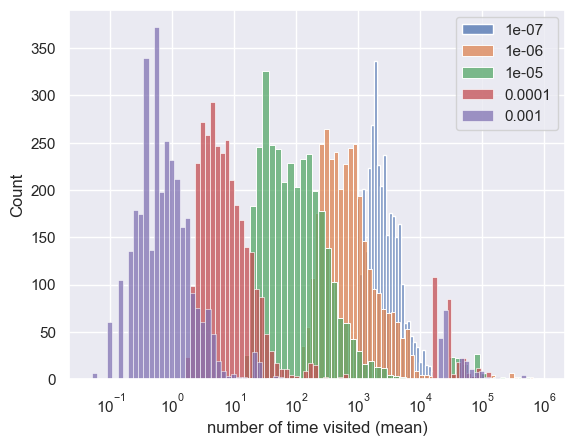

In [18]:
sns.set(style="darkgrid")
for beta in [1e-07,1e-06,1e-05,0.0001, 0.001]:
    df = dct_for_hist[beta]
    sns.histplot(data=df, x="number of time visited (mean)", label=beta, log_scale=True)
plt.legend()    
plt.show()

In [27]:
df_for_boxplot

,action,beta,state,Player1,Player2,number of time visited (mean)
0,0,1.000000e-07,0,2577.9,2526.6,2552.25
1,1,1.000000e-07,0,3573.6,3711.7,3642.65
2,2,1.000000e-07,0,4488.2,4385.4,4436.80
3,3,1.000000e-07,0,4854.6,4785.6,4820.10
4,4,1.000000e-07,0,4334.1,4478.4,4406.25
...,...,...,...,...,...,...
3370,10,7.500000e-03,224,0.9,0.3,0.60
3371,11,7.500000e-03,224,0.0,0.1,0.05
3372,12,7.500000e-03,224,0.0,0.0,0.00
3373,13,7.500000e-03,224,0.0,0.0,0.00


In [28]:
from matplotlib.legend_handler import HandlerBase
class HandlerBoxPlot(HandlerBase):
    def create_artists(self, legend, orig_handle,
                   xdescent, ydescent, width, height, fontsize,
                   trans):
        a_list = []
        a_list.append(Line2D(np.array([0, 0, 1, 1, 0])*width-xdescent, 
                                              np.array([0.25, 0.75, 0.75, 0.25, 0.25])*height-ydescent)) # box

        a_list.append(Line2D(np.array([0.5,0.5])*width-xdescent,
                                              np.array([0.75,1])*height-ydescent)) # top vert line

        a_list.append(Line2D(np.array([0.5,0.5])*width-xdescent,
                                              np.array([0.25,0])*height-ydescent)) # bottom vert line

        a_list.append(Line2D(np.array([0.25,0.75])*width-xdescent,
                                              np.array([1,1])*height-ydescent)) # top whisker

        a_list.append(Line2D(np.array([0.25,0.75])*width-xdescent,
                                              np.array([0,0])*height-ydescent)) # bottom whisker

        a_list.append(Line2D(np.array([0,1])*width-xdescent,
                                              np.array([0.5,0.5])*height-ydescent, lw=2)) # median
        for a in a_list:
            a.set_color(orig_handle.get_color())
        return a_list

In [44]:
def repart_count(df_beta, title='Box Plots of number of visits by cells for Different $\\beta$ values'):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 7))
    
    # Sort the dataframe by 'beta' column in ascending order
    df_beta_sorted = df_beta.sort_values(by='beta')

    
    sns.boxplot(x='beta', y=df_beta_sorted["number of time visited (mean)"], color='g', data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'],log_scale=True)

    plt.axhline(y=10**2, color='black', linestyle='--', label='Collusion Profits')
    plt.xlabel('Beta', fontsize=15)
    plt.ylabel('Number of visits', fontsize=15)
    plt.title(title, fontsize=15, y=1.1)
    # Ajouter la légende manuellement
    
    # Define custom tick labels for the x-axis
    beta_values = df_beta_sorted['beta'].unique()
    beta_labels = ['{:.1e}'.format(beta) for beta in beta_values]

    #Define the legend
    l1 = Line2D([0], [0], color='g')

    plt.legend([l1], ["number of time visited (mean)"], handler_map={l1:HandlerBoxPlot(),}, handleheight=3, bbox_to_anchor=(0.7,1.1), ncol=2, fontsize=10)
    
    # Set custom tick positions and labels on the x-axis and y-axis
    plt.xticks(ticks=range(len(beta_values)), labels=beta_labels, rotation=45, fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

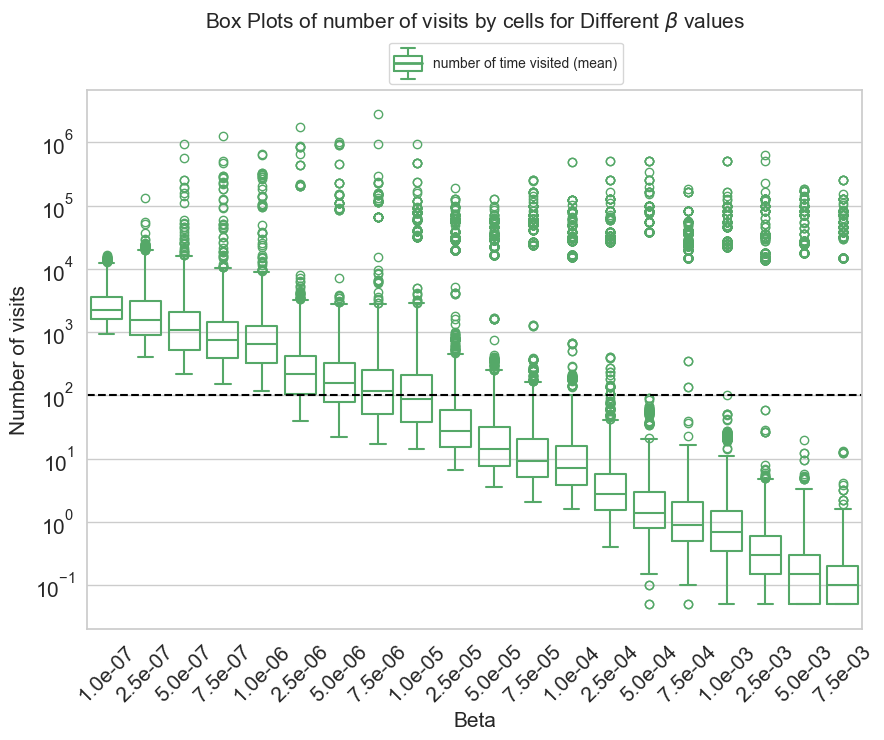

In [45]:
repart_count(df_for_boxplot)